In [1]:
import pandas as pd 
import numpy as np 
import os
import torch
from torch import nn
from matplotlib import pyplot as plt

# DNN Laboratory 2024

## Why are Activation Functions and Hidden Layers important?

Consider the following example:

In [2]:
two_bits = [[0,0],[0,1],[1,0],[1,1]]
two_bits_df = pd.DataFrame(two_bits)

In [3]:
two_bits_df

,0,1
0,0,0
1,0,1
2,1,0
3,1,1


The 2D XOR gate is true only when the two bits are different.

In [4]:
two_bits_df['XOR'] = two_bits_df[0] ^ two_bits_df[1]
two_bits_df

,0,1,XOR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


Let's plot this example on a two-dimensional plane.

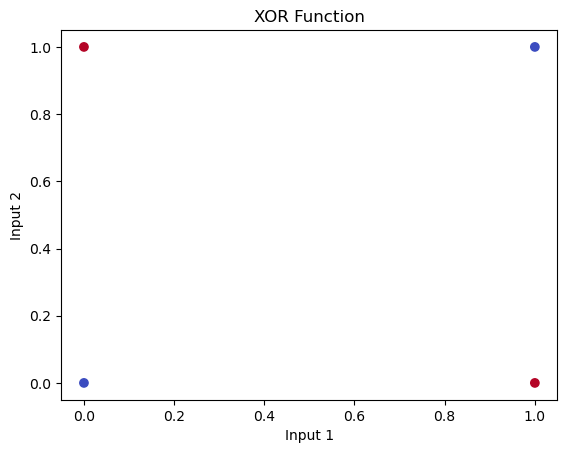

In [5]:
plt.scatter(two_bits_df[0], two_bits_df[1], cmap='coolwarm', c=two_bits_df['XOR'])
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Function')
plt.show()

Let us define the same Shallow Neural Network, but this time, without Activation Functions.

In [6]:
class ShallowNeuralNetwork(nn.Module):
    def __init__(self, input_size, num_hidden, output_size):
        super(ShallowNeuralNetwork, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.fc1 = nn.Linear(input_size, num_hidden)
        self.output_layer = nn.Linear(num_hidden, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.output_layer(x)
        return x

In [7]:
shallow_nn = ShallowNeuralNetwork(2,5,1)

We now train the model on the XOR data. Ignore the details, as they will be presented later in this course.

In [8]:
#train the model on the XOR data
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(shallow_nn.parameters(), lr=0.1)
X = torch.tensor(two_bits, dtype=torch.float32)
y = torch.tensor(two_bits_df['XOR'].values, dtype=torch.float32).view(-1,1)

for epoch in range(1000):
    optimizer.zero_grad()
    output = shallow_nn(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

In [9]:
for epoch in range(1000):
    optimizer.zero_grad()
    output = shallow_nn(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

In [10]:
predictions = shallow_nn(X)
predictions = predictions.detach().numpy()
print(X)
predictions.round()

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

The shallow neural network is unable to solve the XOR problem.

The problem is we cannot linearly separate the output of the XOR gate.

C:\Users\dange\AppData\Local\Temp\ipykernel_13576\4001775181.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = shallow_nn(torch.tensor([X[i,j], Y[i,j]], dtype=torch.float32)).detach().numpy().round()


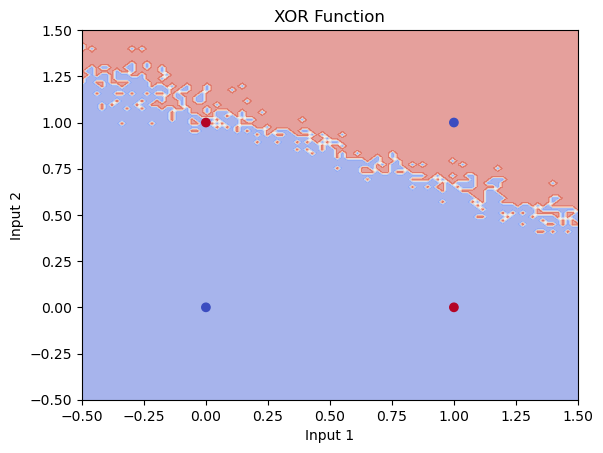

In [11]:
#plot non-linear decision boundary
x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j] = shallow_nn(torch.tensor([X[i,j], Y[i,j]], dtype=torch.float32)).detach().numpy().round()

plt.contourf(X, Y, Z, cmap='coolwarm', alpha=0.5)
plt.scatter(two_bits_df[0], two_bits_df[1], cmap='coolwarm', c=two_bits_df['XOR'])
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Function')
plt.show()

Introducing non-linearity is required to solve this problem.

Remember that, even with an activation function, a simple perceptron is also bound by linear decision boundaries.

Here is an image of a perceptron for reference:

![images/perceptron.png](images/perceptron.png) 

For this reason, if we modify our net to NOT contain hidden layers, we will incur in the same problem: we will not be able to solve the XOR gate, even if we include an activation function.

In [12]:
class ShallowNeuralNetwork(nn.Module):
    def __init__(self, num_hidden, output_size):
        super(ShallowNeuralNetwork, self).__init__()
        self.output_size = output_size
        self.output_layer = nn.Linear(num_hidden, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

In [13]:
shallow_nn = ShallowNeuralNetwork(2,1)

In [14]:
#train the model on the XOR data
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(shallow_nn.parameters(), lr=0.1)
X = torch.tensor(two_bits, dtype=torch.float32)
y = torch.tensor(two_bits_df['XOR'].values, dtype=torch.float32).view(-1,1)

for epoch in range(1000):
    optimizer.zero_grad()
    output = shallow_nn(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

In [15]:
predictions = shallow_nn(X)
predictions = predictions.detach().numpy()
print(X)
predictions.round()

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

C:\Users\dange\AppData\Local\Temp\ipykernel_13576\2376598229.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = shallow_nn(torch.tensor([X[i,j], Y[i,j]], dtype=torch.float32)).detach().numpy().round()


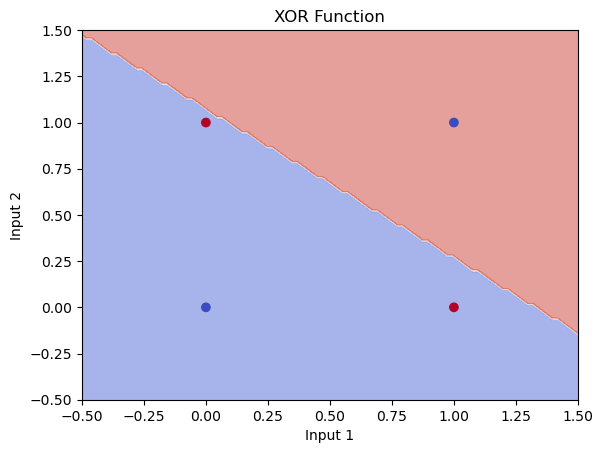

In [16]:
x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j] = shallow_nn(torch.tensor([X[i,j], Y[i,j]], dtype=torch.float32)).detach().numpy().round()

plt.contourf(X, Y, Z, cmap='coolwarm', alpha=0.5)
plt.scatter(two_bits_df[0], two_bits_df[1], cmap='coolwarm', c=two_bits_df['XOR'])
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Function')
plt.show()

Notice how, from the figure, we went back to linear boundaries.

## To solve the XOR problem (or problems requiring non-linear decision boundaries) we need DEEP Neural networks with non-linear activation functions.

Let's insert activation functions to introduce non-linearity.

In [17]:
class ShallowNeuralNetwork(nn.Module):
    def __init__(self, input_size, num_hidden, output_size):
        super(ShallowNeuralNetwork, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.fc1 = nn.Linear(input_size, num_hidden)
        self.output_layer = nn.Linear(num_hidden, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

In [18]:
shallow_nn = ShallowNeuralNetwork(2,5,1)

In [19]:
#train the model on the XOR data
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(shallow_nn.parameters(), lr=0.1)
X = torch.tensor(two_bits, dtype=torch.float32)
y = torch.tensor(two_bits_df['XOR'].values, dtype=torch.float32).view(-1,1)

for epoch in range(10000):
    optimizer.zero_grad()
    output = shallow_nn(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

In [20]:
predictions = shallow_nn(X)
predictions = predictions.detach().numpy()
print(X)
predictions.round()

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

C:\Users\dange\AppData\Local\Temp\ipykernel_13576\4001775181.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = shallow_nn(torch.tensor([X[i,j], Y[i,j]], dtype=torch.float32)).detach().numpy().round()


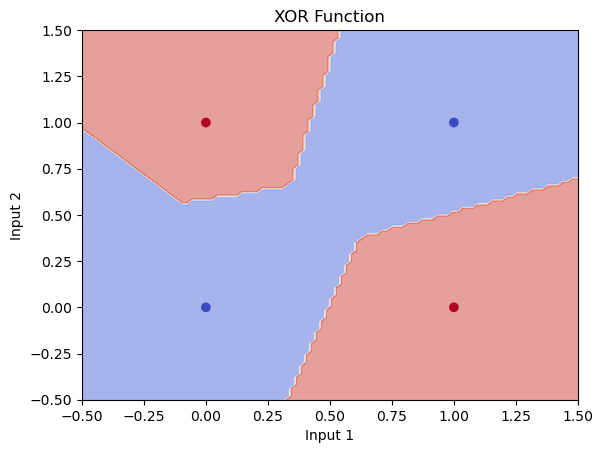

In [21]:
#plot non-linear decision boundary
x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j] = shallow_nn(torch.tensor([X[i,j], Y[i,j]], dtype=torch.float32)).detach().numpy().round()

plt.contourf(X, Y, Z, cmap='coolwarm', alpha=0.5)
plt.scatter(two_bits_df[0], two_bits_df[1], cmap='coolwarm', c=two_bits_df['XOR'])
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Function')
plt.show()